# **AULA 1 - Python e Pandas**

## Análise Descritiva da base de notas do Movie Lens.

- Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Coletando os dados

Dados dos filmes

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv'
movie = pd.read_csv(url)

In [3]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Dados das classificações dos filmes

In [4]:
url1 = 'https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true'
rating = pd.read_csv(url1)

In [5]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


- Analisando a estrutura dos dataset

In [6]:
movie.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [7]:
movie.shape

(9742, 3)

In [8]:
len(movie)

9742

In [9]:
type(movie)

pandas.core.frame.DataFrame

In [10]:
rating.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [11]:
rating.shape

(100836, 4)

In [12]:
len(rating)

100836

In [13]:
type(rating)

pandas.core.frame.DataFrame

- Editando as colunas dos datasets

In [14]:
movie.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [15]:
movie.columns = ['MovieID', 'Title','Genres']

In [16]:
movie.columns

Index(['MovieID', 'Title', 'Genres'], dtype='object')

In [17]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [18]:
rating.columns = ['UserID','MovieID','Rating','Momento']

In [19]:
rating.columns

Index(['UserID', 'MovieID', 'Rating', 'Momento'], dtype='object')

- Analisando os dados apenas do filme 1

In [20]:
movie_1 = rating.query('MovieID == 1')
movie_1.head()

,UserID,MovieID,Rating,Momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [21]:
movie_1.describe()

,UserID,MovieID,Rating,Momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


Vendo apenas a media dos dados do dataset

In [22]:
movie_1.mean()

UserID     3.065302e+02
MovieID    1.000000e+00
Rating     3.920930e+00
Momento    1.129835e+09
dtype: float64

- Coletando apenas as notas dos filmes

In [23]:
rating['Rating']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: Rating, Length: 100836, dtype: float64

In [24]:
rating['Rating'].mean()

3.501556983616962

- Encontrando a media de todos os filmes do dataset 

In [25]:
movie_mean_rating = rating.groupby('MovieID')['Rating'].mean()
movie_mean_rating

MovieID
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: Rating, Length: 9724, dtype: float64

- Adicionando a media das notas dos filmes na base de dados original

In [26]:
type(movie)

pandas.core.frame.DataFrame

In [27]:
type(movie_mean_rating)

pandas.core.series.Series

Para garantir que a nota média da coluna nova criada seja a nota do seu respectivo filme, vamos utilizar o metodo join() e criar um novo dataset

In [28]:
movie_mean = movie.join(movie_mean_rating, on="MovieID")
movie_mean.head()

,MovieID,Title,Genres,Rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Ordenando em ordem decrescente de notas o dataset criado

In [29]:
movie_mean = movie_mean.sort_values("Rating", ascending=False)
movie_mean.head()

,MovieID,Title,Genres,Rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0


- Criando graficos para análise

Histograma do filme Toy Story

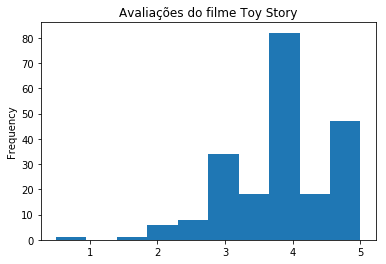

In [30]:
rating.query("MovieID == 1")["Rating"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

Histograma do filme Jumanji

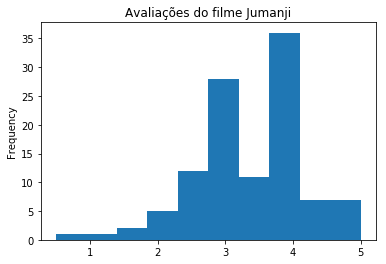

In [31]:
rating.query("MovieID == 2 ")["Rating"].plot(kind='hist')
plt.title("Avaliações do filme Jumanji")
plt.show()

Histograma da animação Liga da Justiça: Doom

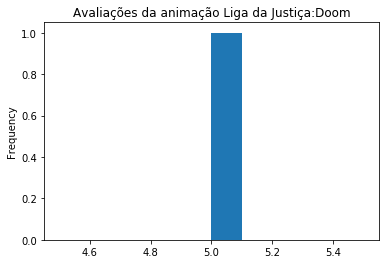

In [32]:
rating.query("MovieID == 102084")["Rating"].plot(kind='hist')
plt.title("Avaliações da animação Liga da Justiça:Doom")
plt.show()

Dado esse cenário a primeira coisa que me chama a atenção é a animação da liga da justiça ter média de nota igual a 5. Ao analisar o histograma do respectivo filme, verificamos que ele só teve uma avaliação igual a 5, logo, fica evidente que a **quantidade de votos é um aspecto importante na avaliação das médias**. Com apenas uma avaliação, não conseguimos garantir que o filme é realmente bom, tornando a avaliação muito "volátil". Imagina que Liga da Justiça receba mais uma avaliação, com nota 0, assim a média seria 2.5. Apenas com mais essa avaliação o filme passaria a ser considerada um "pior" que Jumanji e Toy Story.

Outro ponto interessante é comparar o histograma de Toy Story e Jumanji, ambos tem médias "relativamente próximas". Mas repare que a distribuição de notas são diferentes, Toy Story recebe mais notas 5 e 4 que qualquer outra nota, enquanto Jumanji recebe mais notas 4 e 3, assim concluímos que a **distribuição das notas também é um fator importante na avaliação das médias**

## Desafio 1

- Determine quantos filmes não tem avaliações e quais são esses filmes.

Verificando se existe valores nulos e quantos no dataset

In [33]:
movie_null = movie_mean.query("Rating != Rating")

In [36]:
movie_null['Title']

816                            Innocents, The (1961)
2211                                  Niagara (1953)
2499                          For All Mankind (1989)
2587    Color of Paradise, The (Rang-e khoda) (1999)
3118                  I Know Where I'm Going! (1945)
4037                              Chosen, The (1981)
4506     Road Home, The (Wo de fu qin mu qin) (1999)
4598                                  Scrooge (1970)
4704                                    Proof (1991)
5020                       Parallax View, The (1974)
5293                        This Gun for Hire (1942)
5421                    Roaring Twenties, The (1939)
5452                     Mutiny on the Bounty (1962)
5749              In the Realms of the Unreal (2004)
5824                        Twentieth Century (1934)
5837                       Call Northside 777 (1948)
5957                    Browning Version, The (1951)
7565                              Chalet Girl (2011)
Name: Title, dtype: object

## Desafio 2

- Mudar o nome da coluna nota do dataframe **movie_mean** para mean após o join.

In [37]:
movie_mean

,MovieID,Title,Genres,Rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [38]:
movie_mean = movie_mean.rename(columns = {'Rating': 'Mean'})


In [39]:
movie_mean.head()

,MovieID,Title,Genres,Mean
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0


## Desafio 3

- Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [40]:
total_rating_movie = rating.groupby('MovieID')['Rating'].count()
total_rating_movie.head()

MovieID
1    215
2    110
3     52
4      7
5     49
Name: Rating, dtype: int64

Adicionando a Serie com o quantidade total de votos no dataset original

In [42]:
movie_mean_total = movie_mean.join(total_rating_movie, on='MovieID')
movie_mean_total= movie_mean_total.rename(columns={'Rating': 'Count Rating'})
movie_mean_total.head()

,MovieID,Title,Genres,Mean,Count Rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,1.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0,1.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,1.0
9094,143511,Human (2015),Documentary,5.0,1.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,1.0


## Desafio 4

- Arredondar as médias (coluna de nota média) para duas casas decimais.

In [43]:
movie_mean_total['Mean'] = movie_mean_total['Mean'].round(2)
movie_mean_total

,MovieID,Title,Genres,Mean,Count Rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,1.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0,1.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,1.0
9094,143511,Human (2015),Documentary,5.0,1.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,1.0
...,...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN,NaN


## Desafio 5

- Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [44]:
genre = movie_mean_total.Genres.str.get_dummies('|')
generos = genre.columns.to_list()
generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

## Desafio 6

- Contar o número de aparições de cada genero.

In [45]:
movie_genre = movie_mean_total.Genres.str.get_dummies().sum()
movie_genre

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

## Desafio 7

- Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

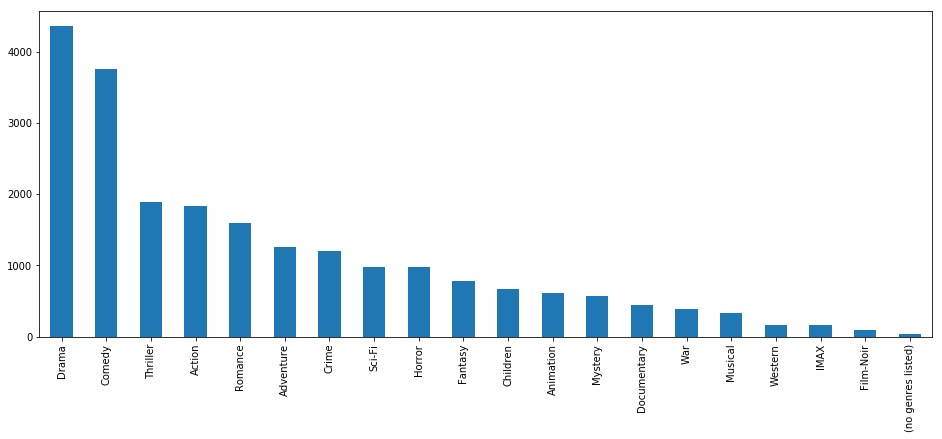

In [46]:
movie_genre.sort_values(ascending=False).plot(kind='bar', figsize=(16, 6))